<a href="https://colab.research.google.com/github/dariamm03/Machine_Learning/blob/main/MachineLearning12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание:
Реализовать классификацию изображений используя метод гистограмм ориентированных градиентов (HOG). Для этого необходимо сформировать библиотеку изображений, принадлежащих к одному классу и не принадлежащих к нему (не менее 10 изображений). Применить к ним метод. Сделать вывод о полученных результатах.

In [ ]:
import os
import numpy as np
import pandas as pd

from skimage.feature import hog
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

HOG - метод компьютерного зрения, который используется для извлечения особых признаков из изображений.
Изображение разделяется на маленькие ячейки, и в каждой ячейке вычисляются градиенты яркости. Затем градиенты объединяются в гистограммы направлений, которые представляют распределение направлений градиентов в ячейке. Наконец, гистограммы объединяются в блоки, чтобы получить окончательное представление признаков.

In [ ]:
input_path_cow = '/content/data/cow'
input_path_land = '/content/data/landscape'
cow = os.listdir(input_path_cow)
n1 = len(cow)
image1 = []

for i in range(n1):
    image = resize(imread(os.path.join(input_path_cow, cow[i])), (100, 100))
    image1.append(image)

land = os.listdir(input_path_land)
n2 = len(land)
image2 = []

for i in range(n2):
    image = resize(imread(os.path.join(input_path_land, land[i])), (100, 100))
    image2.append(image)

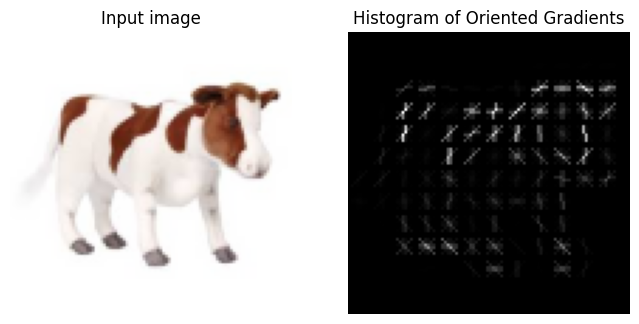

In [ ]:
fd, hog_image = hog(image1[0], orientations=6, pixels_per_cell=(8, 8), cells_per_block=(3, 3),visualize=True, channel_axis=-1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image1[0], cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.axis('off')
ax2.imshow(hog_image, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [ ]:
# Применяем метод HOG (выделяем признаки)
hog_images1 = []
hog_features1 = []
#Получаем значения для HOG для обоих наборов данных и строим их
for img in image1:
    fd, hog_image = hog(img, orientations=6, pixels_per_cell=(8, 8), cells_per_block=(3, 3),visualize=True, channel_axis=-1)
    hog_images1.append(hog_image)
    hog_features1.append(fd)

In [ ]:
hog_images2 = []
hog_features2 = []
for img in image2:
    fd, hog_image = hog(img, orientations=6, pixels_per_cell=(8, 8), cells_per_block=(3, 3),visualize=True, channel_axis=-1)
    hog_images2.append(hog_image)
    hog_features2.append(fd)

In [ ]:
# Превратим наши массивы в датафрейм и присвоим класс нашим картинкам, где 1 - корова, 0 - пейзаж
hog_features1 = np.vstack(hog_features1)
df1 = pd.DataFrame(hog_features1)
hog_features2 = np.vstack(hog_features2)
df2 = pd.DataFrame(hog_features2)
df1['Class'] = 1
df2['Class'] = 0
data = pd.concat([df1, df2], axis=0)
data = data.sample(frac=1).reset_index(drop=True) #перемешиваем данные

data.head()

,0,1,2,3,4,5,6,7,8,9,...,5391,5392,5393,5394,5395,5396,5397,5398,5399,Class
0,0.162717,0.077297,0.072685,0.113243,0.058628,0.156092,0.227320,0.136251,0.061593,0.170601,...,0.309411,0.052341,0.036585,0.010446,0.019601,0.308037,0.173339,0.067315,0.031654,0
1,0.006966,0.000000,0.161628,0.022628,0.000000,0.000000,0.011260,0.031808,0.117118,0.049992,...,0.134467,0.112294,0.107041,0.042667,0.120693,0.232921,0.240636,0.091652,0.055561,1
2,0.080785,0.034552,0.010935,0.072064,0.104214,0.065737,0.067656,0.034001,0.047315,0.154132,...,0.212819,0.212819,0.010394,0.072057,0.058725,0.167256,0.212819,0.129447,0.112167,0
3,0.044088,0.085200,0.165587,0.027456,0.018939,0.032049,0.039039,0.047167,0.282755,0.020639,...,0.165861,0.208688,0.139138,0.038106,0.140512,0.137543,0.130130,0.170955,0.098499,0
4,0.024686,0.000000,0.045769,0.283704,0.047123,0.000000,0.025529,0.002637,0.188735,0.283704,...,0.305037,0.305037,0.126655,0.081006,0.305037,0.305037,0.243893,0.021949,0.071771,0


In [ ]:
# разделим данные для обучения
X = data.drop(columns=['Class'])
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# применим к данным 4 классификатора: kNN, SVM, дерево решений, и классификатор, основанные на нейросети
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
res_knn = knn_model.predict(X_test.values)

svm_model = SVC(probability=True, kernel="linear")
svm_model.fit(X_train, y_train)
res_svm = svm_model.predict(X_test)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
res_dt = dt_model.predict(X_test)

NN_model = MLPClassifier()
NN_model.fit(X_train, y_train)
res_NN = NN_model.predict(X_test)

In [ ]:
# Оценим качество работы классификаторов

# Вычисление ROC-кривых
fpr_svm, tpr_svm, _ = roc_curve(y_test, res_svm)
fpr_knn, tpr_knn, _ = roc_curve(y_test, res_knn)
fpr_nb, tpr_nb, _ = roc_curve(y_test, res_NN)
fpr_dt, tpr_dt, _ = roc_curve(y_test, res_dt)

# Рассчитать площадь под ROC-кривой
auc_svm = roc_auc_score(y_test, res_svm)
auc_knn = roc_auc_score(y_test, res_knn)
auc_nb = roc_auc_score(y_test, res_NN)
auc_dt = roc_auc_score(y_test, res_dt)
print('SVM', auc_svm)
print('KNN', auc_knn)
print('NB', auc_nb)
print('DT', auc_dt)

SVM 0.898989898989899
KNN 0.9090909090909092
NB 0.8535353535353535
DT 0.7424242424242425


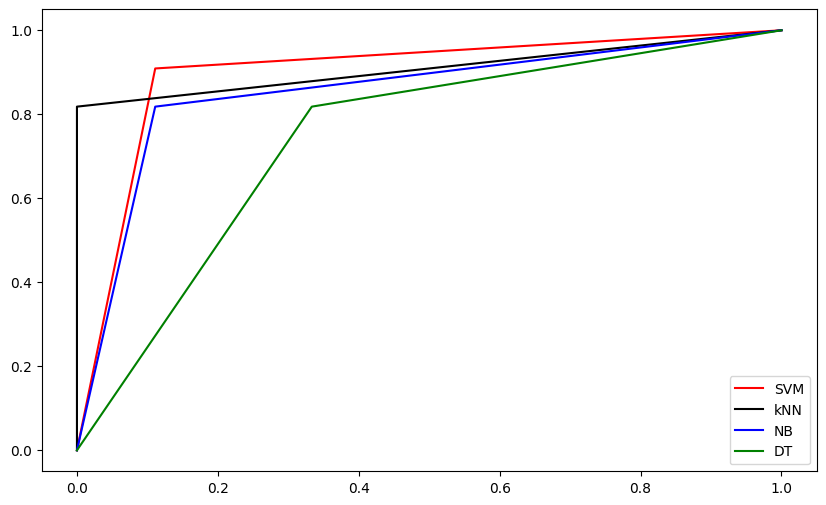

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(fpr_svm, tpr_svm, color='red', linestyle='solid', label='SVM')
ax.plot(fpr_knn, tpr_knn, color='black', linestyle='solid', label='kNN')
ax.plot(fpr_nb, tpr_nb, color='blue', linestyle='solid', label='NB')
ax.plot(fpr_dt, tpr_dt, color='green', linestyle='solid', label='DT')
ax.legend()

In [ ]:
print('Результат kNN: \n', classification_report(y_test, res_knn))
print('Результат SVM: \n', classification_report(y_test, res_svm))
print('Результат Decision Tree: \n', classification_report(y_test, res_dt))
print('Результат Neural Network: \n', classification_report(y_test, res_NN))

Результат kNN: 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.82      0.90        11

    accuracy                           0.90        20
   macro avg       0.91      0.91      0.90        20
weighted avg       0.92      0.90      0.90        20

Результат SVM: 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.91      0.91      0.91        11

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20

Результат Decision Tree: 
               precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.75      0.82      0.78        11

    accuracy                           0.75        20
   macro avg       0.75      0.74      0.74        20
weighted avg 